In [842]:
print('Hello World')

Hello World


---

Installing & Importing Necessary Libraries:

---

In [843]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [844]:
sns.set_theme(palette="Set2", style="whitegrid", 
              rc={"lines.linewidth": 1.5, 
                  "grid.color": "lightgrey",
                  "grid.linestyle": "-",
                  "grid.linewidth": 0.1})

In [845]:
housing_df = pd.read_csv('./2_house_price_periods.csv')

housing_df.sample(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/00,...,5/31/24,6/30/24,7/31/24,8/31/24,9/30/24,10/31/24,11/30/24,12/31/24,1/31/25,2/28/25
21514,79214,22390,48445,zip,MI,MI,Kinde,NaN,Huron County,NaN,...,129768.4919,131283.1429,132309.6447,133441.0641,133865.4768,134002.6336,133373.7944,132992.7928,133094.8548,133880.5660
3542,60534,3581,7018,zip,NJ,NJ,East Orange,"New York-Newark-Jersey City, NY-NJ-PA",Essex County,145781.26250,...,421307.0843,422453.6085,425233.7125,430026.9480,435409.0128,439275.9994,443178.0207,446061.1414,448540.1359,449394.4161
25406,66657,28619,20838,zip,MD,MD,Barnesville,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Montgomery County,NaN,...,694652.3144,696625.8407,697362.5415,697466.0421,698454.8459,699062.9729,700684.9341,703005.6624,704679.5582,704836.6146
1256,91437,1273,76502,zip,TX,TX,Temple,"Killeen-Temple, TX",Bell County,NaN,...,283597.8423,283252.3130,282501.0846,281914.7091,281409.1047,280821.1053,279920.5110,278991.2848,278332.2942,277846.3557
9559,97212,9680,93286,zip,CA,CA,Woodlake,"Visalia, CA",Tulare County,92317.98658,...,305837.2879,307133.4637,307631.3848,307914.9428,308599.6764,309681.7581,310629.0400,312066.7868,313235.8135,314253.5196
13163,60815,13354,7826,zip,NJ,NJ,Branchville,"New York-Newark-Jersey City, NY-NJ-PA",Sussex County,158185.70310,...,419307.4590,423255.0404,426573.5185,428682.1011,429426.4693,429021.1577,428440.5189,428565.1618,428792.3707,429529.5863
21834,83072,22784,57012,zip,SD,SD,Canistota,"Sioux Falls, SD",McCook County,NaN,...,286155.8469,287485.6248,288511.5476,290046.3304,290786.1164,292039.1909,294385.7480,298055.0141,302474.1041,306789.6980
23854,86121,25523,63625,zip,MO,MO,Black,NaN,Reynolds County,NaN,...,168813.6801,170503.9473,172429.5472,174406.3924,176072.0523,177529.9320,178709.7338,179726.5799,179760.0587,179058.6383
15387,74841,15655,38477,zip,TN,TN,Prospect,NaN,Giles County,69213.07326,...,234641.1720,237957.1621,239884.3333,240317.0675,239029.9669,237564.4880,235757.3251,236325.3286,237247.9109,238857.1432
24106,90479,25924,74632,zip,OK,OK,Braman,"Ponca City, OK",Kay County,37523.41532,...,106038.8026,106302.9316,106699.7344,107615.7653,107791.7765,107614.4324,106776.6592,106953.8881,107091.4559,107363.1358


In [846]:
print(type(housing_df))

<class 'pandas.core.frame.DataFrame'>


---

Let's First Filter Out by the Metro Area

---

In [847]:
housing_df['Metro'].unique()

array(['Houston-The Woodlands-Sugar Land, TX',
       'New York-Newark-Jersey City, NY-NJ-PA', 'El Paso, TX',
       'Austin-Round Rock-Georgetown, TX',
       'Los Angeles-Long Beach-Anaheim, CA',
       'Chicago-Naperville-Elgin, IL-IN-WI',
       'Nashville-Davidson--Murfreesboro--Franklin, TN',
       'Atlanta-Sandy Springs-Alpharetta, GA',
       'Riverside-San Bernardino-Ontario, CA',
       'San Francisco-Oakland-Berkeley, CA',
       'Dallas-Fort Worth-Arlington, TX', 'Bakersfield, CA',
       'San Antonio-New Braunfels, TX', 'Brownsville-Harlingen, TX',
       'San Diego-Chula Vista-Carlsbad, CA',
       'McAllen-Edinburg-Mission, TX', 'Oxnard-Thousand Oaks-Ventura, CA',
       'Santa Cruz-Watsonville, CA', 'Fresno, CA',
       'Kennewick-Richland, WA', 'Sacramento-Roseville-Folsom, CA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV', 'Raleigh-Cary, NC',
       'Oklahoma City, OK', 'Urban Honolulu, HI', 'Clarksville, TN-KY',
       'Phoenix-Mesa-Chandler, AZ', 'San Jose

In [848]:
housing_df = housing_df[housing_df['Metro'] == 'Atlanta-Sandy Springs-Alpharetta, GA']

housing_df['Metro'].unique()

array(['Atlanta-Sandy Springs-Alpharetta, GA'], dtype=object)

---

Now Let's First Filter Out by the target zipcodes

---

In [849]:
target_zip_codes = pd.read_csv('./atlanta_zip_codes.csv')

target_zip_codes

,zip
0,30002
1,30030
2,30032
3,30033
4,30067
5,30079
6,30080
7,30084
8,30303
9,30305


In [850]:
housing_df['RegionName'].unique()

array([30002, 30004, 30005, 30008, 30009, 30011, 30012, 30013, 30014,
       30016, 30017, 30019, 30021, 30022, 30024, 30025, 30028, 30030,
       30032, 30033, 30034, 30035, 30038, 30039, 30040, 30041, 30043,
       30044, 30045, 30046, 30047, 30052, 30054, 30055, 30056, 30058,
       30060, 30062, 30064, 30066, 30067, 30068, 30071, 30072, 30075,
       30076, 30078, 30079, 30080, 30082, 30083, 30084, 30087, 30088,
       30092, 30093, 30094, 30096, 30097, 30101, 30102, 30103, 30106,
       30107, 30108, 30110, 30113, 30114, 30115, 30116, 30117, 30120,
       30121, 30122, 30126, 30127, 30132, 30134, 30135, 30137, 30141,
       30143, 30144, 30145, 30148, 30152, 30157, 30168, 30170, 30171,
       30175, 30176, 30177, 30178, 30179, 30180, 30182, 30183, 30184,
       30185, 30187, 30188, 30189, 30204, 30205, 30206, 30213, 30214,
       30215, 30216, 30217, 30218, 30220, 30222, 30223, 30224, 30228,
       30233, 30234, 30236, 30238, 30248, 30251, 30252, 30253, 30256,
       30257, 30258,

In [851]:
housing_df = housing_df[housing_df['RegionName'].isin(target_zip_codes['zip'])]
housing_df['RegionName'].unique()

array([30002, 30030, 30032, 30033, 30067, 30079, 30080, 30084, 30303,
       30305, 30306, 30307, 30308, 30309, 30310, 30311, 30312, 30313,
       30314, 30315, 30316, 30317, 30318, 30319, 30324, 30326, 30327,
       30328, 30329, 30337, 30338, 30339, 30340, 30341, 30342, 30344,
       30345, 30346, 30354, 30360, 30363])

In [852]:
housing_df.sample(2)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/00,...,5/31/24,6/30/24,7/31/24,8/31/24,9/30/24,10/31/24,11/30/24,12/31/24,1/31/25,2/28/25
10160,71033,9724,30313,zip,GA,GA,Atlanta,"Atlanta-Sandy Springs-Alpharetta, GA",Fulton County,209292.84690,...,350115.4712,348931.5333,346909.0234,345329.6120,343866.5851,342562.275,340528.4951,338867.4193,337544.7946,337324.8528
1404,70858,14585,30079,zip,GA,GA,Scottdale,"Atlanta-Sandy Springs-Alpharetta, GA",Dekalb County,70657.90914,...,311283.2195,311592.3420,311234.0950,310572.3616,309872.1958,309311.476,309123.3747,308620.6149,307624.6039,306406.5863


---

Now that we have selected only Desired Zipcode let's continue with checking the data integrity

---

In [853]:
housing_df.describe()

,RegionID,SizeRank,RegionName,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,6/30/00,7/31/00,...,5/31/24,6/30/24,7/31/24,8/31/24,9/30/24,10/31/24,11/30/24,12/31/24,1/31/25,2/28/25
count,41.000000,41.000000,41.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,...,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,71003.829268,5496.658537,30272.512195,186787.091266,187639.025949,188537.004229,190354.687883,192202.536089,194118.334493,196119.022562,...,4.808013e+05,4.804103e+05,4.789701e+05,4.775057e+05,4.765723e+05,4.759740e+05,4.755189e+05,4.751970e+05,4.748949e+05,4.748795e+05
std,86.938744,4175.094931,112.251976,105193.288070,105779.429567,106385.317850,107550.655852,108436.083173,109162.840602,109784.121790,...,2.169872e+05,2.174864e+05,2.171484e+05,2.165719e+05,2.167195e+05,2.175546e+05,2.186698e+05,2.198408e+05,2.207306e+05,2.219090e+05
min,70789.000000,300.000000,30002.000000,51146.276670,51496.442370,51812.951750,52409.568200,53047.933680,53636.080470,54211.632610,...,2.351099e+05,2.342735e+05,2.328193e+05,2.315298e+05,2.304831e+05,2.293255e+05,2.281320e+05,2.269609e+05,2.251035e+05,2.232963e+05
25%,71026.000000,2813.000000,30306.000000,124017.734450,124595.743950,124830.952100,125776.164150,126886.813050,129328.915200,132278.029300,...,3.326510e+05,3.311768e+05,3.289591e+05,3.268790e+05,3.247529e+05,3.223465e+05,3.198026e+05,3.186651e+05,3.180807e+05,3.172689e+05
50%,71036.000000,4290.000000,30316.000000,158823.421900,159866.145500,161072.802900,163352.365400,165784.525500,168258.405100,170954.852100,...,4.502572e+05,4.499409e+05,4.486143e+05,4.476149e+05,4.472513e+05,4.471416e+05,4.467216e+05,4.460844e+05,4.455949e+05,4.451189e+05
75%,71056.000000,7313.000000,30338.000000,239680.282500,241204.159400,242306.230500,244759.707100,246991.873750,249510.332500,252074.376700,...,5.541083e+05,5.539341e+05,5.526030e+05,5.510483e+05,5.505091e+05,5.501129e+05,5.500264e+05,5.498582e+05,5.496849e+05,5.493442e+05
max,71079.000000,19350.000000,30363.000000,615813.945500,619719.090600,623703.966700,631753.221500,638252.948800,643566.415300,647879.610100,...,1.394502e+06,1.396219e+06,1.391464e+06,1.385755e+06,1.382594e+06,1.382203e+06,1.382696e+06,1.384281e+06,1.385730e+06,1.390384e+06


In [854]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 20 to 16075
Columns: 311 entries, RegionID to 2/28/25
dtypes: float64(302), int64(3), object(6)
memory usage: 99.9+ KB


In [855]:
# Force verbose output so all columns are listed
housing_df.info(verbose=True, max_cols=311)

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 20 to 16075
Data columns (total 311 columns):
 #    Column      Non-Null Count  Dtype  
---   ------      --------------  -----  
 0    RegionID    41 non-null     int64  
 1    SizeRank    41 non-null     int64  
 2    RegionName  41 non-null     int64  
 3    RegionType  41 non-null     object 
 4    StateName   41 non-null     object 
 5    State       41 non-null     object 
 6    City        41 non-null     object 
 7    Metro       41 non-null     object 
 8    CountyName  41 non-null     object 
 9    1/31/00     39 non-null     float64
 10   2/29/00     39 non-null     float64
 11   3/31/00     39 non-null     float64
 12   4/30/00     39 non-null     float64
 13   5/31/00     39 non-null     float64
 14   6/30/00     39 non-null     float64
 15   7/31/00     39 non-null     float64
 16   8/31/00     39 non-null     float64
 17   9/30/00     39 non-null     float64
 18   10/31/00    39 non-null     float64
 19   11/30/00 

---

Converting the Data types as needed from numerical and object into categorical for better perfomance

---

In [856]:
cols_to_convert = ['RegionName', 'RegionType', 'StateName','State','City','Metro','CountyName',]

housing_df[cols_to_convert] = housing_df[cols_to_convert].astype('category')

In [857]:
housing_df.info(verbose=True, max_cols=311)

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 20 to 16075
Data columns (total 311 columns):
 #    Column      Non-Null Count  Dtype   
---   ------      --------------  -----   
 0    RegionID    41 non-null     int64   
 1    SizeRank    41 non-null     int64   
 2    RegionName  41 non-null     category
 3    RegionType  41 non-null     category
 4    StateName   41 non-null     category
 5    State       41 non-null     category
 6    City        41 non-null     category
 7    Metro       41 non-null     category
 8    CountyName  41 non-null     category
 9    1/31/00     39 non-null     float64 
 10   2/29/00     39 non-null     float64 
 11   3/31/00     39 non-null     float64 
 12   4/30/00     39 non-null     float64 
 13   5/31/00     39 non-null     float64 
 14   6/30/00     39 non-null     float64 
 15   7/31/00     39 non-null     float64 
 16   8/31/00     39 non-null     float64 
 17   9/30/00     39 non-null     float64 
 18   10/31/00    39 non-null     flo

In [858]:
# housing_df_melted = housing_df.melt(
#     id_vars=['RegionID', 'RegionName'],  # keep these as identifiers
#     var_name='Date',
#     value_name='Price'
# )

# housing_df_melted.info()

In [859]:
# This will update df directly.
housing_df.dropna(inplace = True)


In [860]:
housing_df.isna().sum()

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
             ..
10/31/24      0
11/30/24      0
12/31/24      0
1/31/25       0
2/28/25       0
Length: 311, dtype: int64

In [861]:
housing_df.sample(2)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/00,...,5/31/24,6/30/24,7/31/24,8/31/24,9/30/24,10/31/24,11/30/24,12/31/24,1/31/25,2/28/25
13973,71062,2609,30344,zip,GA,GA,East Point,"Atlanta-Sandy Springs-Alpharetta, GA",Fulton County,78485.60337,...,256216.7011,254629.6963,252775.4751,251387.5864,250211.0706,248538.3544,246616.5547,244799.5163,243532.8031,242151.6071
13511,71056,2289,30338,zip,GA,GA,Dunwoody,"Atlanta-Sandy Springs-Alpharetta, GA",Dekalb County,268229.92910,...,677167.0439,679167.0223,679558.7703,679675.6061,680305.4342,682418.5881,685442.3374,687978.0390,689210.5622,690002.4757


---

Preliminary plotting:

---

In [862]:
housing_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 20 to 15954
Data columns (total 311 columns):
 #    Column      Dtype   
---   ------      -----   
 0    RegionID    int64   
 1    SizeRank    int64   
 2    RegionName  category
 3    RegionType  category
 4    StateName   category
 5    State       category
 6    City        category
 7    Metro       category
 8    CountyName  category
 9    1/31/00     float64 
 10   2/29/00     float64 
 11   3/31/00     float64 
 12   4/30/00     float64 
 13   5/31/00     float64 
 14   6/30/00     float64 
 15   7/31/00     float64 
 16   8/31/00     float64 
 17   9/30/00     float64 
 18   10/31/00    float64 
 19   11/30/00    float64 
 20   12/31/00    float64 
 21   1/31/01     float64 
 22   2/28/01     float64 
 23   3/31/01     float64 
 24   4/30/01     float64 
 25   5/31/01     float64 
 26   6/30/01     float64 
 27   7/31/01     float64 
 28   8/31/01     float64 
 29   9/30/01     float64 
 30   10/31/01    float64 
 31   

---

Since all of the data is from the same state and the same Metro area, let's drop the following variables {'StateName','State', 'Metro', 'RegionType'} so they don't repeat every time:

---

In [863]:
housing_df.sample(2)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/00,...,5/31/24,6/30/24,7/31/24,8/31/24,9/30/24,10/31/24,11/30/24,12/31/24,1/31/25,2/28/25
13366,71055,8589,30337,zip,GA,GA,College Park,"Atlanta-Sandy Springs-Alpharetta, GA",Fulton County,127217.5298,...,307339.9418,307158.8146,306258.4396,305670.8524,304909.6573,303655.8537,301829.8574,299870.9305,298600.8357,297854.9029
12407,71045,10577,30326,zip,GA,GA,Atlanta,"Atlanta-Sandy Springs-Alpharetta, GA",Fulton County,325628.7241,...,427899.0683,426441.8537,424210.1263,422424.5168,420670.3246,419110.6926,417312.5087,416278.2689,415825.4766,416102.0691


In [864]:
housing_df = housing_df.drop(columns=['StateName','State', 'Metro', 'RegionType'])

housing_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 20 to 15954
Data columns (total 307 columns):
 #    Column      Dtype   
---   ------      -----   
 0    RegionID    int64   
 1    SizeRank    int64   
 2    RegionName  category
 3    City        category
 4    CountyName  category
 5    1/31/00     float64 
 6    2/29/00     float64 
 7    3/31/00     float64 
 8    4/30/00     float64 
 9    5/31/00     float64 
 10   6/30/00     float64 
 11   7/31/00     float64 
 12   8/31/00     float64 
 13   9/30/00     float64 
 14   10/31/00    float64 
 15   11/30/00    float64 
 16   12/31/00    float64 
 17   1/31/01     float64 
 18   2/28/01     float64 
 19   3/31/01     float64 
 20   4/30/01     float64 
 21   5/31/01     float64 
 22   6/30/01     float64 
 23   7/31/01     float64 
 24   8/31/01     float64 
 25   9/30/01     float64 
 26   10/31/01    float64 
 27   11/30/01    float64 
 28   12/31/01    float64 
 29   1/31/02     float64 
 30   2/28/02     float64 
 31   

In [865]:
housing_df.sample(2)

,RegionID,SizeRank,RegionName,City,CountyName,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,...,5/31/24,6/30/24,7/31/24,8/31/24,9/30/24,10/31/24,11/30/24,12/31/24,1/31/25,2/28/25
1145,70847,1322,30067,Marietta,Cobb County,145837.9933,145981.8125,146441.3293,147370.7733,148428.8456,...,414086.1965,414188.3103,413444.4972,412766.7948,412363.3897,411942.2376,411368.3871,410906.6745,410303.9608,409441.9720
10892,71035,2528,30315,Atlanta,Fulton County,117048.3817,117768.6286,118181.7944,119169.6703,120161.9060,...,263385.3924,261893.9855,259973.3976,258396.1159,256357.4204,254229.7409,252438.6068,250919.7323,250183.1606,249424.4484


In [866]:
housing_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 20 to 15954
Data columns (total 307 columns):
 #    Column      Dtype   
---   ------      -----   
 0    RegionID    int64   
 1    SizeRank    int64   
 2    RegionName  category
 3    City        category
 4    CountyName  category
 5    1/31/00     float64 
 6    2/29/00     float64 
 7    3/31/00     float64 
 8    4/30/00     float64 
 9    5/31/00     float64 
 10   6/30/00     float64 
 11   7/31/00     float64 
 12   8/31/00     float64 
 13   9/30/00     float64 
 14   10/31/00    float64 
 15   11/30/00    float64 
 16   12/31/00    float64 
 17   1/31/01     float64 
 18   2/28/01     float64 
 19   3/31/01     float64 
 20   4/30/01     float64 
 21   5/31/01     float64 
 22   6/30/01     float64 
 23   7/31/01     float64 
 24   8/31/01     float64 
 25   9/30/01     float64 
 26   10/31/01    float64 
 27   11/30/01    float64 
 28   12/31/01    float64 
 29   1/31/02     float64 
 30   2/28/02     float64 
 31   

---

Now we're going to use a bar plot to display discrete / categorical data and we're going to use Histogram to display in numerical variables

---

In [867]:
# categorical_data = pd.DataFrame()
# categorical_data[['RegionID', 'SizeRank']] = housing_df[['RegionID', 'SizeRank']]
# categorical_data = housing_df.select_dtypes(include=['category',])

# categorical_data.info()

---

The Above approach, although does select all the necessary columns however it does not deserve the intended order so we will try to do it differently:

---

In [868]:
cols = ['RegionID', 'SizeRank'] + [col for col in housing_df.select_dtypes(include=['category']).columns if col not in {'RegionID', 'SizeRank'}]

categorical_data = housing_df[cols]

categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 20 to 15954
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   RegionID    39 non-null     int64   
 1   SizeRank    39 non-null     int64   
 2   RegionName  39 non-null     category
 3   City        39 non-null     category
 4   CountyName  39 non-null     category
dtypes: category(3), int64(2)
memory usage: 3.2 KB


Plotting:  RegionID


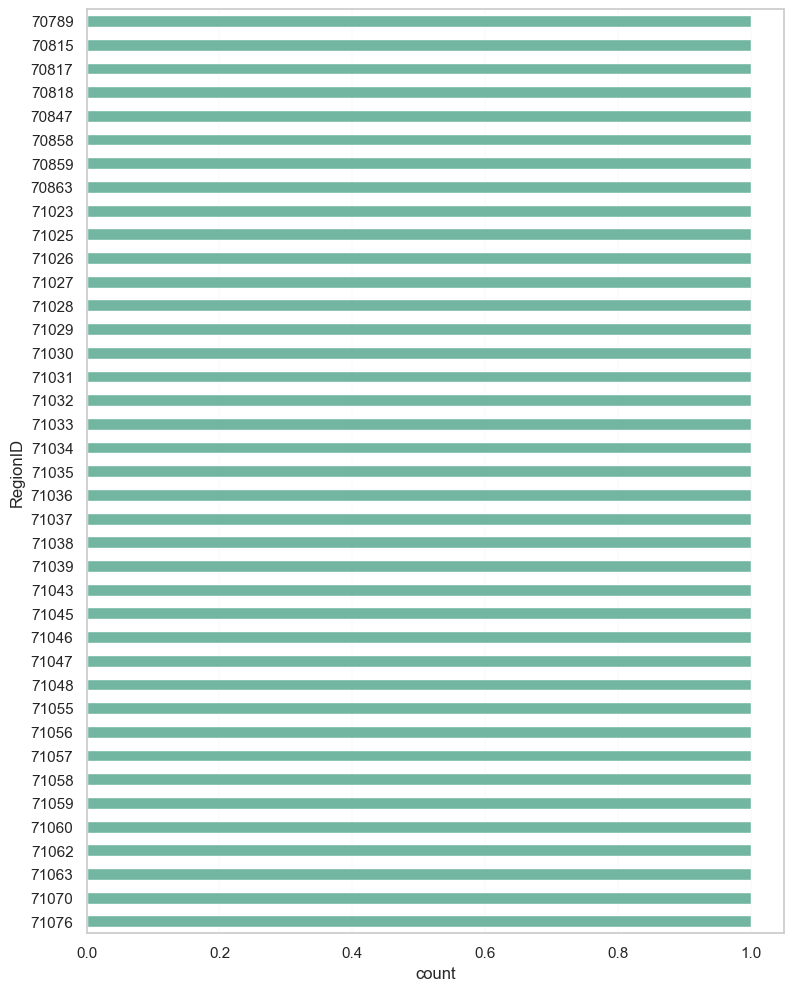

Plotting:  SizeRank


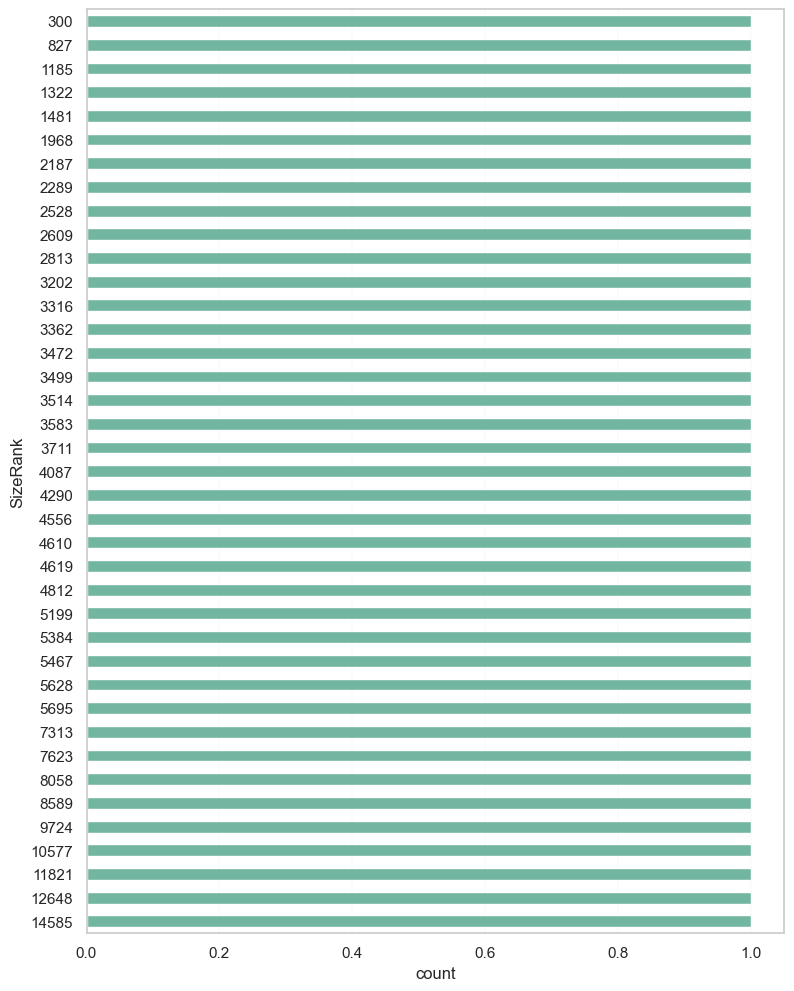

Plotting:  RegionName


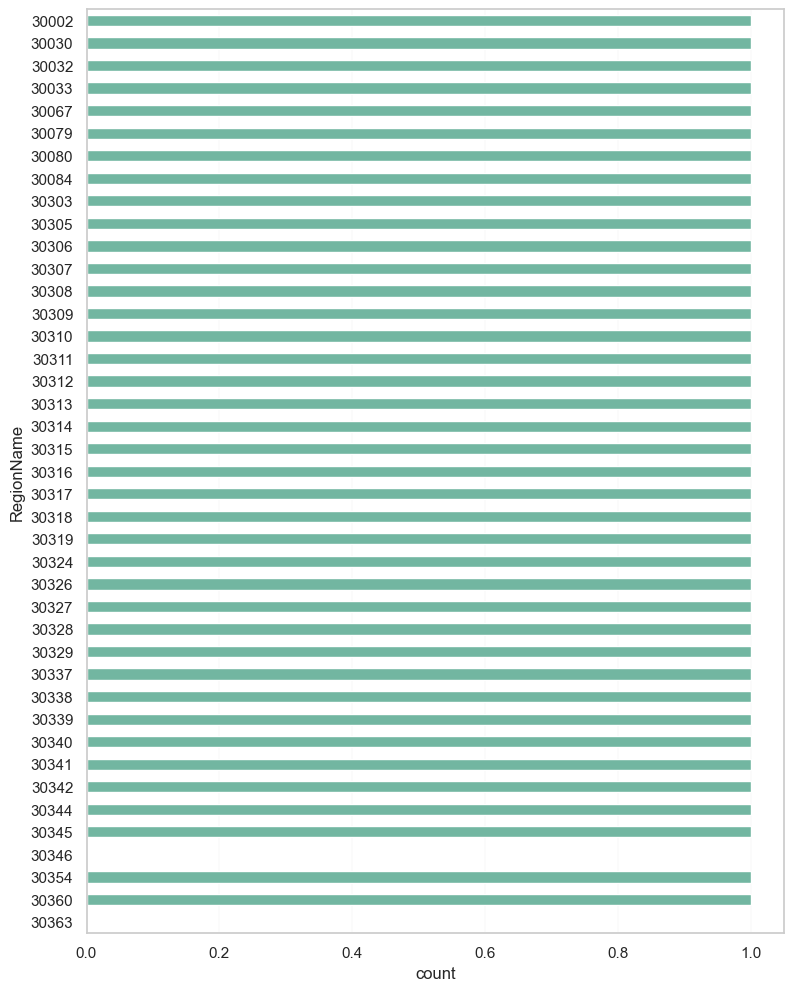

Plotting:  City


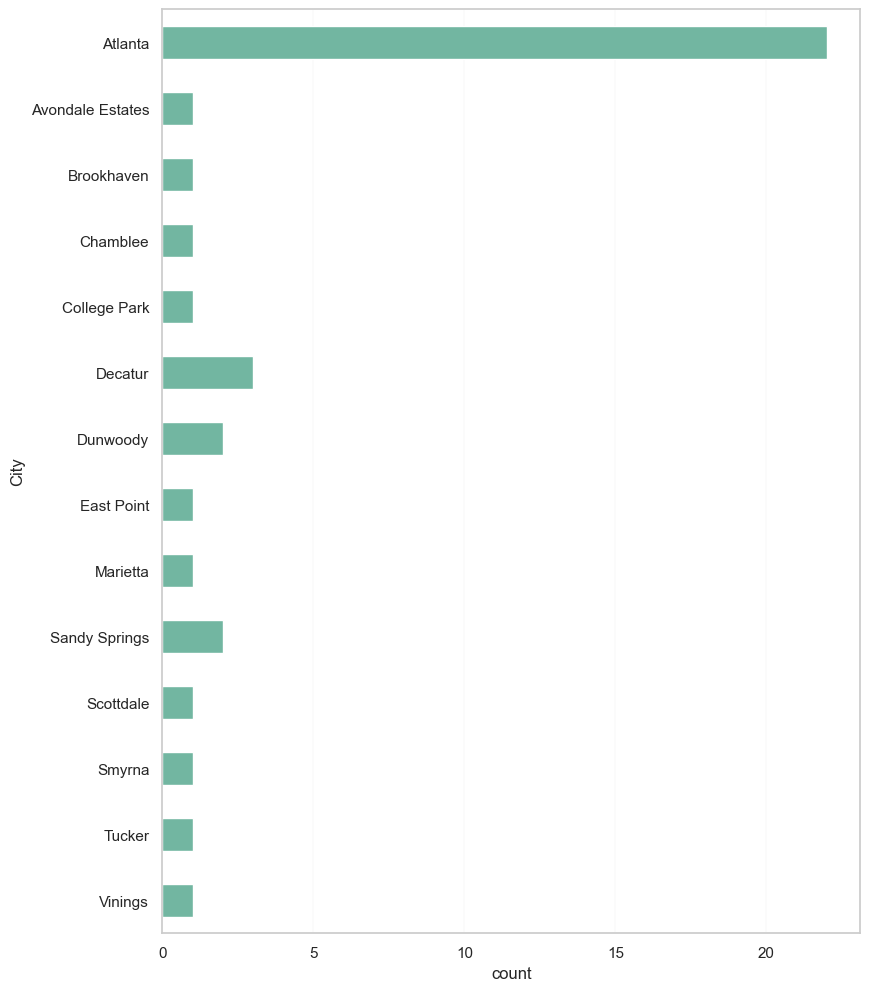

Plotting:  CountyName


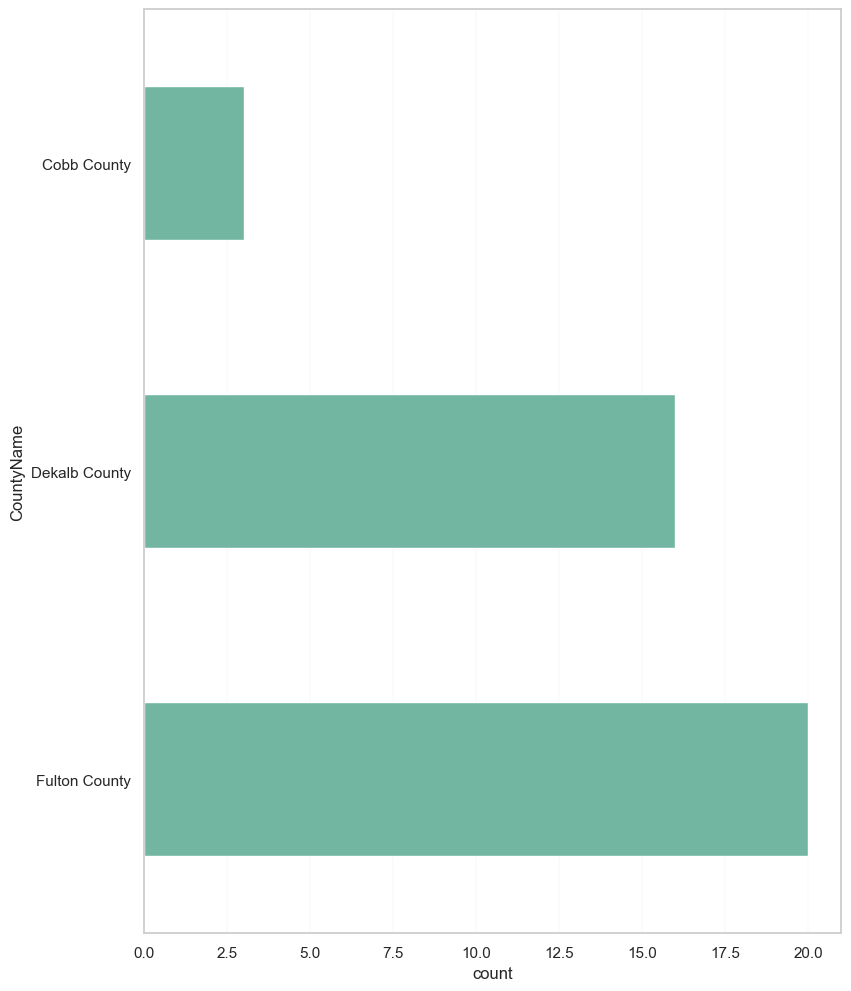

In [869]:

for col in categorical_data.columns:
    print("Plotting: ", col);
    plt.figure(figsize=(9,12));
    ax = sns.countplot(data=categorical_data, y=col, width=0.5)
    # ax.set_xscale('log') # Applying log scale to x-axis
    plt.show()

---

Preliminary Data Plotting does not see to yeild any usefull info, probably because we are dealign with a time series data. 

Now Let's take a look at the numerical values.

---

In [870]:
numerical_housing_df = housing_df.select_dtypes('number')

numerical_housing_df.sample(2)

,RegionID,SizeRank,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,6/30/00,7/31/00,8/31/00,...,5/31/24,6/30/24,7/31/24,8/31/24,9/30/24,10/31/24,11/30/24,12/31/24,1/31/25,2/28/25
10892,71035,2528,117048.3817,117768.6286,118181.7944,119169.6703,120161.9060,120955.0689,121816.4465,122253.6568,...,263385.3924,261893.9855,259973.3976,258396.1159,256357.4204,254229.7409,252438.6068,250919.7323,250183.1606,249424.4484
9279,71026,4556,292719.9773,294401.0137,295720.1832,298636.8435,301363.3429,304164.8072,306766.7876,308947.3469,...,878200.7687,878277.7640,875712.6556,872300.7039,872373.5452,873919.5254,875983.0702,877767.8974,879403.8490,881063.2640


In [871]:

# for col in numerical_housing_df.columns:
#     print("Plotting: ", col);
#     plt.figure(figsize=(8,4));
#     ax = sns.histplot(data=numerical_housing_df, x=col)
#     # ax.set_xscale('log') # Applying log scale to x-axis
#     plt.show()

---

***

Both Numerical and Categorical variables when plotted in the original format directly from the data set which is a "Wide Data Frame" with time series, doesn't allow us effectively plot the data. The data is repetetive, hard to read and very separated. 

So we are going to melt the data i.e.: we will Reshape our wide-format data (with one column per date) to a long format using pd.melt() so that each row becomes a (Region, Date, Price) entry.

Long-format data is easier to analyze, especially for time-series plotting and aggregation.

***

---

In [872]:
housing_df.head(1)

,RegionID,SizeRank,RegionName,City,CountyName,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,...,5/31/24,6/30/24,7/31/24,8/31/24,9/30/24,10/31/24,11/30/24,12/31/24,1/31/25,2/28/25
20,70789,12648,30002,Avondale Estates,Dekalb County,163727.9605,164622.1274,165588.0437,167352.5636,168992.4012,...,525007.7871,525996.2758,525846.1516,524946.4863,524553.5127,524306.7938,524617.512,525400.8617,526048.3807,527102.7744


In [873]:
# 1. Identify identifier columns (metadata we want to keep)
id_cols = ['RegionID', 'RegionName', 'City', 'CountyName', 'SizeRank']

# 2. Melt all the remaining columns (the date‑price columns) into two columns: “Date” and “Price”
long_housing_df = pd.melt(
    housing_df,
    id_vars=id_cols, # The Columns we intend to keep
    var_name='Date', # name for the new “variable” column
    value_name='Price' # name for the new “value” column
)

# 3. Inspect the result
long_housing_df.shape

(11778, 7)

In [874]:
long_housing_df.head(1)

,RegionID,RegionName,City,CountyName,SizeRank,Date,Price
0,70789,30002,Avondale Estates,Dekalb County,12648,1/31/00,163727.9605


In [875]:
long_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11778 entries, 0 to 11777
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   RegionID    11778 non-null  int64   
 1   RegionName  11778 non-null  category
 2   City        11778 non-null  category
 3   CountyName  11778 non-null  category
 4   SizeRank    11778 non-null  int64   
 5   Date        11778 non-null  object  
 6   Price       11778 non-null  float64 
dtypes: category(3), float64(1), int64(2), object(1)
memory usage: 404.8+ KB


In [876]:
long_housing_df['Date'] = pd.to_datetime(long_housing_df['Date'])

/var/folders/f3/k494q71x50b02p2h67qp0r880000gn/T/ipykernel_66722/929965233.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  long_housing_df['Date'] = pd.to_datetime(long_housing_df['Date'])


In [877]:
long_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11778 entries, 0 to 11777
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    11778 non-null  int64         
 1   RegionName  11778 non-null  category      
 2   City        11778 non-null  category      
 3   CountyName  11778 non-null  category      
 4   SizeRank    11778 non-null  int64         
 5   Date        11778 non-null  datetime64[ns]
 6   Price       11778 non-null  float64       
dtypes: category(3), datetime64[ns](1), float64(1), int64(2)
memory usage: 404.8 KB


In [878]:
long_housing_df['Date'].unique()

<DatetimeArray>
['2000-01-31 00:00:00', '2000-02-29 00:00:00', '2000-03-31 00:00:00',
 '2000-04-30 00:00:00', '2000-05-31 00:00:00', '2000-06-30 00:00:00',
 '2000-07-31 00:00:00', '2000-08-31 00:00:00', '2000-09-30 00:00:00',
 '2000-10-31 00:00:00',
 ...
 '2024-05-31 00:00:00', '2024-06-30 00:00:00', '2024-07-31 00:00:00',
 '2024-08-31 00:00:00', '2024-09-30 00:00:00', '2024-10-31 00:00:00',
 '2024-11-30 00:00:00', '2024-12-31 00:00:00', '2025-01-31 00:00:00',
 '2025-02-28 00:00:00']
Length: 302, dtype: datetime64[ns]

---

Investigating Data Frequency:

---

In [879]:
# Suppose you have a DatetimeIndex of unique dates:
dates = long_housing_df['Date'].drop_duplicates().sort_values()

# 1. Using infer_freq on the array of dates
import pandas as pd
freq = pd.infer_freq(dates)
print(freq)   # e.g. 'M' or 'ME' indicating month-end frequency

# 2. Or via the DatetimeIndex attribute
idx = pd.DatetimeIndex(dates)
print(idx.inferred_freq)   # e.g. 'M'

ME
ME


---

Changing the Date fromat for optimization:

---

In [880]:
# Create a new column with month/year formatted as “mm/yy”
long_housing_df['Date'] = long_housing_df['Date'].dt.strftime('%m/%y')

long_housing_df.sort_values(by='Price', ascending=True)

,RegionID,RegionName,City,CountyName,SizeRank,Date,Price
5712,71034,30314,Atlanta,Fulton County,5467,03/12,2.775161e+04
5673,71034,30314,Atlanta,Fulton County,5467,02/12,2.796526e+04
5751,71034,30314,Atlanta,Fulton County,5467,04/12,2.801778e+04
5790,71034,30314,Atlanta,Fulton County,5467,05/12,2.827209e+04
5829,71034,30314,Atlanta,Fulton County,5467,06/12,2.845719e+04
...,...,...,...,...,...,...,...
11531,71046,30327,Atlanta,Fulton County,5384,08/24,1.385755e+06
11765,71046,30327,Atlanta,Fulton County,5384,02/25,1.390384e+06
11492,71046,30327,Atlanta,Fulton County,5384,07/24,1.391464e+06
11414,71046,30327,Atlanta,Fulton County,5384,05/24,1.394502e+06


In [881]:
long_housing_df.describe()

,RegionID,SizeRank,Price
count,11778.000000,11778.000000,1.177800e+04
mean,71000.358974,4934.692308,2.858168e+05
std,86.619980,3312.927550,1.749767e+05
min,70789.000000,300.000000,2.775161e+04
25%,71025.000000,2609.000000,1.703683e+05
50%,71035.000000,4087.000000,2.527715e+05
75%,71055.000000,5695.000000,3.662271e+05
max,71076.000000,14585.000000,1.396219e+06


Text(0, 0.5, 'Count')

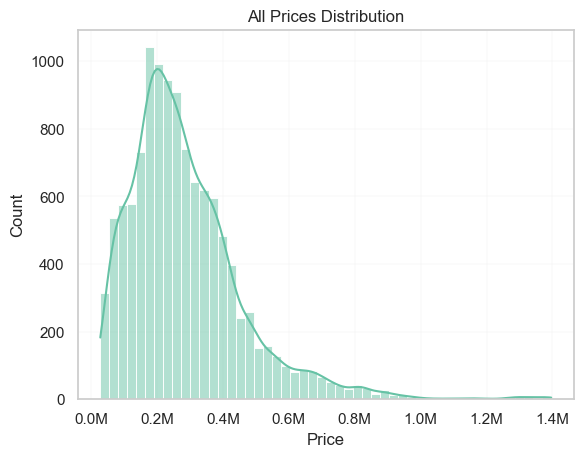

In [917]:
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter, StrMethodFormatter

plt.figure()
sns.histplot(data=long_housing_df, x='Price', bins=50, kde=True);
ax = plt.gca()

# Turning off the scientific notation
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)

# 2) Choose one formatter:
#    a) no decimals:
# ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
#    b) comma thousands, two decimals:
# ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
#    c) show in millions:
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x*1e-6:.1f}M'))

plt.title("All Prices Distribution")
plt.ylabel('Count')
